In [17]:
#Fazendo o projeto 3 com uma matriz diagonal unitária aleatória 
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import expm
from numpy import linalg as la
from scipy.stats import unitary_group
import random
import pylab

In [18]:
#contando o tempo
start_time = time.time()

In [31]:
#Definir os parametros
n = 2000
#Select = 1 -> matriz Não Diagonal
#Select = 2 -> Matriz Diagonal
select = 2


In [32]:
#Criando a matriz randominca sem ser diagoranl e depois diagonal  
if(select == 1):   
    x = unitary_group.rvs(n)
    w=la.eigvals(x)
    F = np.zeros((n , n), dtype = complex)
    for i in range(0,n):
        F[i,i] = w[i]
if(select == 2):
    F = np.zeros((n , n), dtype = complex)
    for i in range(0,n):
        F[i,i] = np.exp(complex(0,1)*np.random.random()*2*np.pi)

In [33]:
#Criando o Phi
phi = np.zeros(n, dtype = complex)

In [34]:
for i in range(0, n):
    phi[i] = np.angle(F[i,i])
    #print(phi[i])

In [35]:
#Pegando o módulo de Phi real
phiR = np.sort(np.real(phi))

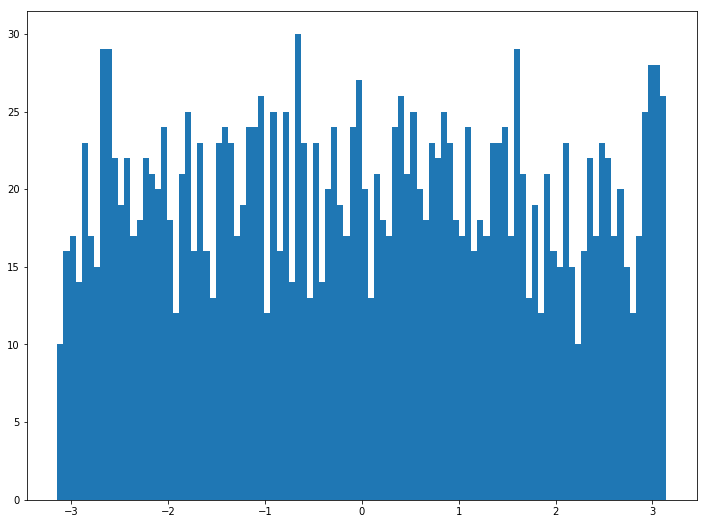

In [36]:
plt.hist(phiR, bins = 100,range = (-np.pi,np.pi))
plt.show()

In [37]:
#Calculando a diferença 
dif = np.zeros(n-1)
for i in range(0, n-1):
    dif[i] = phiR[i+1] - phiR[i]
#print(dif)

In [38]:
#Definindo o PhiBarra(phi médio)
phirbar=(2*np.pi)/(n)
#Dividindo a diferença pelo tamanho do passo
S = dif/phirbar

In [39]:
#Definindo as funções de fundo, Exponencial e Gaussiana
def P1(S):
        return np.exp(-S)

def P2(S):
       return np.exp(- np.pi*S**2/4) * np.pi*S/2


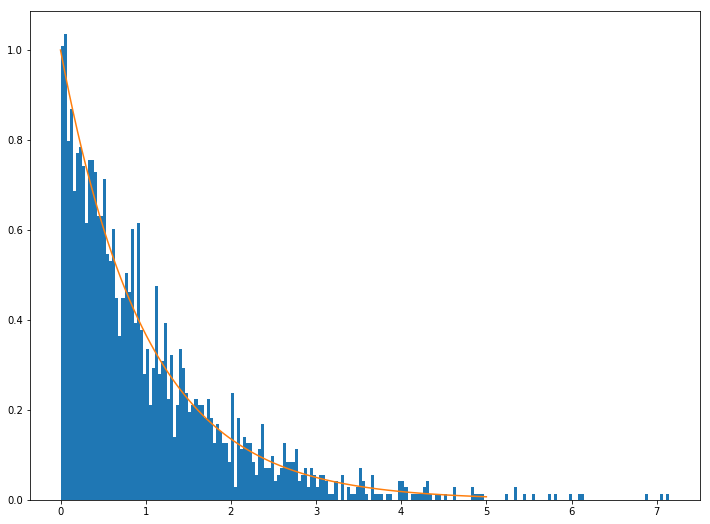

--- 1881.09730005 seconds ---


In [40]:
 if(select == 2):
    plt.rcParams['figure.figsize'] = (12,9)
    #plt.suptitle('Matriz Diagonal', fontsize=17)
    plt.hist(S, bins=200, density=1)
    x = np.linspace(0,5,100) 
    y = P1(x) 
    pylab.plot(x,y) 
    pylab.show() 
    plt.show()
if(select == 1):
    plt.rcParams['figure.figsize'] = (12,9)
    #plt.suptitle('Matriz Não Diagonal ', fontsize=17)
    plt.hist(S, bins=200, density=1)
    x = np.linspace(0,5,100) 
    y = P2(x) 
    pylab.plot(x,y) 
    pylab.show() 
    plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

#plt.hist(dif, bins = 200)
#plt.rcParams['figure.figsize'] = (12,9)
#plt.show()